# Predicting Attrition based on Employee Details 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


First we import all the packages we need and suppress warnings in the notebook

In [0]:
#import all required packages for Data pre processing
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import (accuracy_score, log_loss, classification_report,confusion_matrix)
#TO ignore all warning messages
import warnings
warnings.filterwarnings("ignore")

In [0]:
# reading the data set into a pandas data frame 

hrd = pd.read_csv('/content/gdrive/My Drive/HR_Employee_Attrition_Data-3 (002).csv')#if read from drive-google colab
#hrd = pd.read_csv('HR_Employee_Attrition_Data-3 (002).csv')#if read from local device

# DATA CLEANING

Here we look for null values,missing values,duplicate values and remove all of them from the dataset 

In [0]:
#checing for missed values
#hrd.isnull()
hrd.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null object
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EmployeeNumber              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome         

In [0]:
hrd.isnull().sum()
#no null ccells

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Here we can see that every cell is filled with some value we have no missing values ,nulls or spaces

In [0]:
#To check outliers and invalid values 
pd.set_option('display.max_columns', 35)#to display each and every collumn
hrd.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observation:

    1)Here Collumns Employee count,StandardHours are constant for all the members so they            are Useless for model Prediction so we can drop those columns.
    
    2)For the COLLUMNS EnvironmentSatisfaction,JobInvolvement the variance is less so 
       they would be less helpfull in predicting Attrition Class. 
      
    3)we can see that the TotalWorkingYears is 0 from the min value of that row , this value could 
        be invalid ,  If considered as invalid we will have to either have to remove the row or fill with 
       some arbitrary value or predict them  using some machine learning technique.

    4)Here we can see that Employee no is Unique incremented by one for all the members, since 
        there will be no significant bias of this column data towards any class, It May not say much 
        about the the Attrition Class.So it is better to  Drop this collumn

In [0]:
#checking no of rows with suspected invalid values  
invalid_rows=hrd.loc[(hrd["TotalWorkingYears"] == 0) | (hrd["YearsAtCompany"] == 0) | (hrd["YearsInCurrentRole"] == 0)]
invalid_rows.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,488.000000,488.000000,488.000000,488.000000,488.0,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.0,488.000000,488.000000,488.000000,488.000000,488.000000,488.0,488.000000,488.000000
mean,35.065574,785.618852,8.786885,2.827869,1.0,1453.418033,2.733607,66.581967,2.676230,1.733607,2.721311,5082.487705,14259.372951,2.831967,15.459016,3.159836,2.668033,80.0,0.700820,8.266393,2.909836,2.778689,1.946721,0.0,0.340164,0.938525
std,10.006353,409.118949,7.844201,1.002605,0.0,851.891639,1.109386,19.852987,0.740226,1.044560,1.104497,4379.591235,6953.566056,2.326625,3.628877,0.366830,1.041462,0.0,0.867293,7.806091,1.338141,0.702150,3.204404,0.0,1.092755,2.232923
min,18.000000,104.000000,1.000000,1.000000,1.0,3.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2396.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
25%,28.000000,419.000000,2.000000,2.000000,1.0,699.500000,2.000000,50.000000,2.000000,1.000000,2.000000,2324.250000,8542.250000,1.000000,13.000000,3.000000,2.000000,80.0,0.000000,1.000000,2.000000,2.000000,1.000000,0.0,0.000000,0.000000
50%,35.000000,811.000000,7.000000,3.000000,1.0,1462.000000,3.000000,69.000000,3.000000,1.000000,3.000000,2977.500000,14713.500000,2.000000,14.000000,3.000000,3.000000,80.0,0.000000,6.000000,3.000000,3.000000,1.000000,0.0,0.000000,0.000000
75%,41.250000,1145.250000,12.000000,3.000000,1.0,2166.500000,4.000000,82.000000,3.000000,2.000000,4.000000,6420.000000,19981.250000,4.000000,18.000000,3.000000,3.000000,80.0,1.000000,12.000000,3.000000,3.000000,1.000000,0.0,0.000000,0.000000
max,60.000000,1495.000000,29.000000,5.000000,1.0,2921.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19613.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,34.000000,6.000000,4.000000,26.000000,0.0,7.000000,12.000000


# we remove and modify invalid data/outliers etc(rows and collumns)

In [0]:
#dropping unnecessary columns
hrd=hrd.drop(['EmployeeCount', 'StandardHours',"EmployeeNumber"], axis=1)

In [0]:
''' 
we will use this cell based on the model performance - this is a feauture engineering technique
#so the no of rows with suspected  invalid values are huge so we will add a  mean value under 1, which is 0.5 for all those 
#collumns where there are 0's(assuming that the time spent is less than an year) since zeros make that particular feature
#weight to be useless for that particular datapoint during training
hrd["TotalWorkingYears"][hrd["TotalWorkingYears"] == 0] = 0.5
hrd["YearsAtCompany"][hrd["YearsAtCompany"] == 0] = 0.5
hrd["YearsInCurrentRole"][hrd["YearsInCurrentRole"] == 0] = 0.5
#trainingTimes can be '0' as it is assumed as no of trainings attended
#hrd["TrainingTimesLastYear"][hrd["TrainingTimesLastYear"] == 0] = 0.5
hrd["YearsSinceLastPromotion"][hrd["YearsSinceLastPromotion"] == 0] = 0.5
hrd["YearsWithCurrManager"][hrd["YearsWithCurrManager"] == 0] = 0.5
hrd["StockOptionLevel"][hrd["StockOptionLevel"] == 0] = 0.5
hrd["NumCompaniesWorked"][hrd["NumCompaniesWorked"] == 0] = 0.5
'''

' \nwe will use this cell based on the model performance - this is a feauture engineering technique\n#so the no of rows with suspected  invalid values are huge so we will add a  mean value under 1, which is 0.5 for all those \n#collumns where there are 0\'s(assuming that the time spent is less than an year) since zeros make that particular feature\n#weight to be useless for that particular datapoint during training\nhrd["TotalWorkingYears"][hrd["TotalWorkingYears"] == 0] = 0.5\nhrd["YearsAtCompany"][hrd["YearsAtCompany"] == 0] = 0.5\nhrd["YearsInCurrentRole"][hrd["YearsInCurrentRole"] == 0] = 0.5\n#trainingTimes can be \'0\' as it is assumed as no of trainings attended\n#hrd["TrainingTimesLastYear"][hrd["TrainingTimesLastYear"] == 0] = 0.5\nhrd["YearsSinceLastPromotion"][hrd["YearsSinceLastPromotion"] == 0] = 0.5\nhrd["YearsWithCurrManager"][hrd["YearsWithCurrManager"] == 0] = 0.5\nhrd["StockOptionLevel"][hrd["StockOptionLevel"] == 0] = 0.5\nhrd["NumCompaniesWorked"][hrd["NumCompaniesW

In [0]:
#get all category features into a variable for analysis
category_hrd = hrd.select_dtypes(['object'])
category_hrd.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,2466,2086,1922,1212,1764,652,1346,2940,2108



HERE we can see that the column Over18 has only one unique value so that column can be dropped

In [0]:
#To drop Over18 column
hrd=hrd.drop(['Over18'], axis=1)
#Now our data is cleaned to most extent , we will eliminate other outliers and unusable feautures withe help of EDA

In [0]:
#we will look for dataset as it is thouroghly cleaned now
hrd.duplicated().value_counts()

True     1470
False    1470
dtype: int64

we found that almost half of the dataset contains duplicates so we have to remove them

In [0]:
hrd=hrd.drop_duplicates()
print("so now we have ",hrd.count()[0],"rows")

so now we have  1470 rows


In [0]:
hrd.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data exploration(EDA) AND FEATURE ENGINEERING

In [0]:

#high level analysis on data set
# data points and features
print("(no of Data points,no of collumns)")
print(hrd.shape)
print("collumn-names")
print(hrd.columns)

(no of Data points,no of collumns)
(1470, 31)
collumn-names
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


conclusion:
    so there are 1470 data points and **31** features for each data point

In [0]:
#we will look at few datapoints
hrd.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [0]:
#Attrition is the variable that is needed to predict
hrd["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

1)Attrition has two values("Yes","No") which tells us that we need to build a model that is a binary classifier
2)Here we can see that the dataset is an imbalanced dataset almost 80% of the datapoints belong to "No" class and 20% belong to "yes" class, so it is best to induce imputation techniques(upsampling in train Data )in the model to train models better

In [0]:
#lets change values "Yes" to '1' and "No" to '0' for the collumn "Attrition" ----> predicting feature

def partition(x):
    if x == 'Yes':
        return 1
    return 0

#changing Attriting ,string values to real numbers 
Attrition = hrd['Attrition']
#Here we are storing  the Attrition of the all the datapoints in a variable
attr_bin = Attrition.map(partition) 

In [0]:
#here we will update the Attrition collumn Values with the changed  values
hrd['Attrition']=attr_bin
hrd.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From mean and the maximum value we try to suspect outliers(having a value which too far from mean).there are no columns with such outliers but we can suspect DailyRate,Distance from home,MonthlyRate,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany.We will confirm for outliers from box-plots in the plotting techniques section

In [0]:
# we will find the means of numerical collumns
hrd.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


1) employees with "Atrition "No" (who wants to stay) - on an Average
   a)tend have higher age
   b)higher Daily rate
   c)are living nearer to the organisation
   d)have higher job level
   e)have more stock options
   f)works long than the employees that leave
   g)are more trained
   h)Tend to Have more experience in the company,CurrentRole,More promoted and stayed with curr-manager more than others

Conclution:All these feautures could be used to determine the class(Attrition) of an employee(data point)
   

#we use plotting techniques to get more intuition and information 

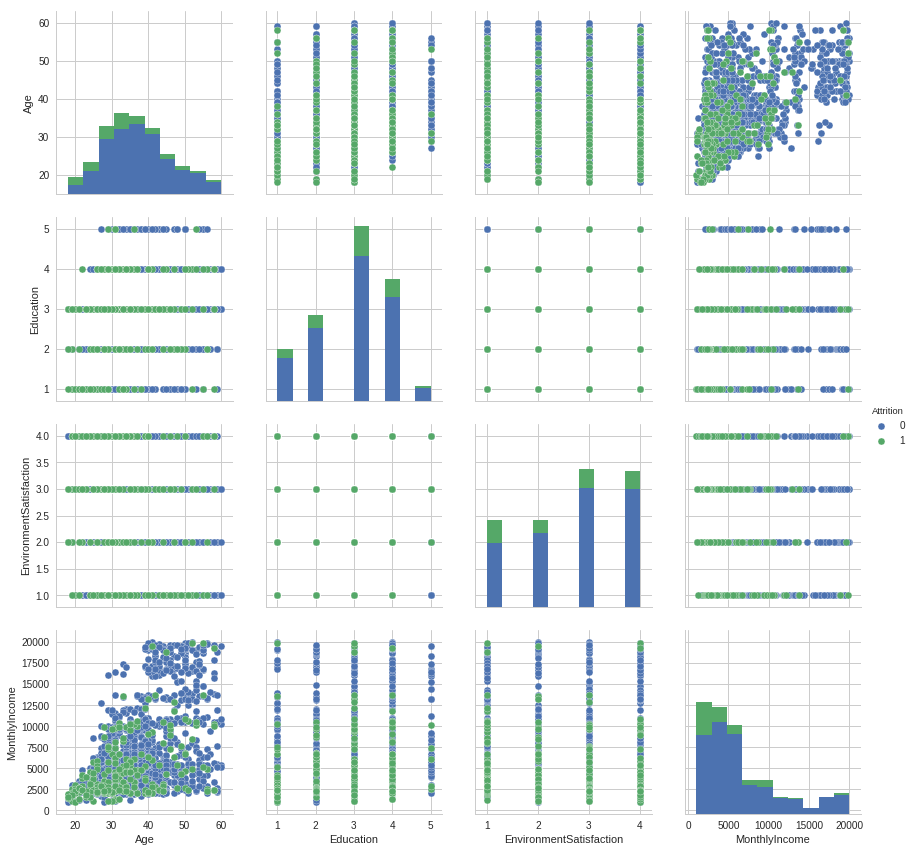

In [0]:
#we will look at the scatter plots of all numerical features
plt.close()
sns.set_style("whitegrid")
#sns.pairplot(hrd,hue="Attrition",size=3,vars=["Age","DailyRate","DistanceFromHome","Education","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"
#]);
sns.pairplot(hrd,hue="Attrition",size=3,vars=["Age","Education","EnvironmentSatisfaction","MonthlyIncome"]);
plt.show()

here no two features gave a clear seperation between two classes
but we can clearly observe from the scatter plot between age and monthly income


1.   people those are leaving the company are having less age(almost b/w 20 to 40) and people with low income or with very high income are leaving the company people with meduim salary rarely leave.



# we will look at few histograms of catogorical variables for data insights

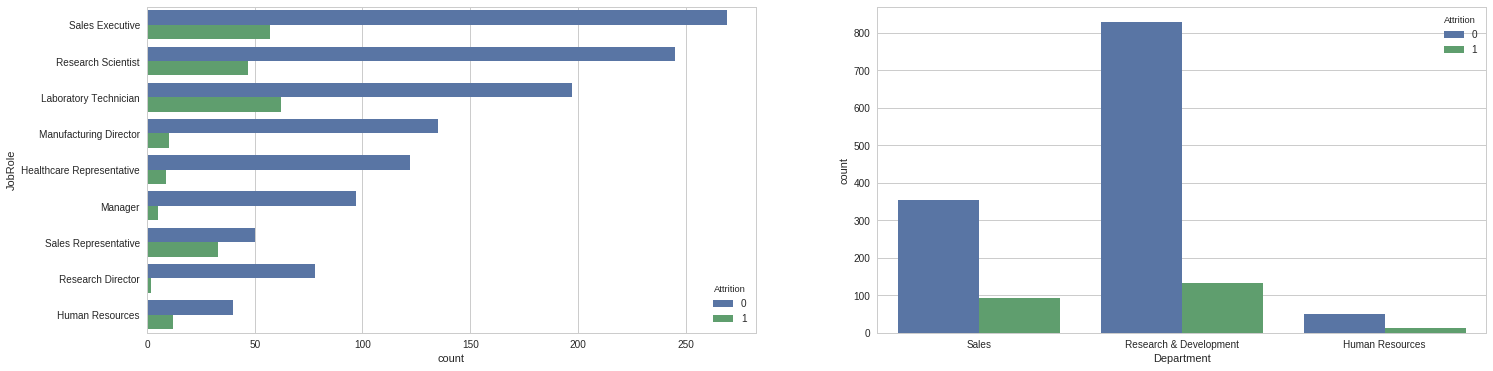

In [0]:
#Attrition across Job Roles and department
fig, ax1 = plt.subplots(1,2, figsize=(24,6))
sns.countplot(x='Department', hue='Attrition', data = hrd, ax = ax1[1])
sns.countplot(y='JobRole', hue='Attrition', data = hrd, ax = ax1[0])
plt.show()




*   Attrition is higher in Sales and R&D Departments(Lab Technicican and Research scientist)
*  we can see that the Laboratory technicians are least satisfied with company and they  are the ones leaving company more comparitively.

*   Attrition is lower in Managers and Director roles






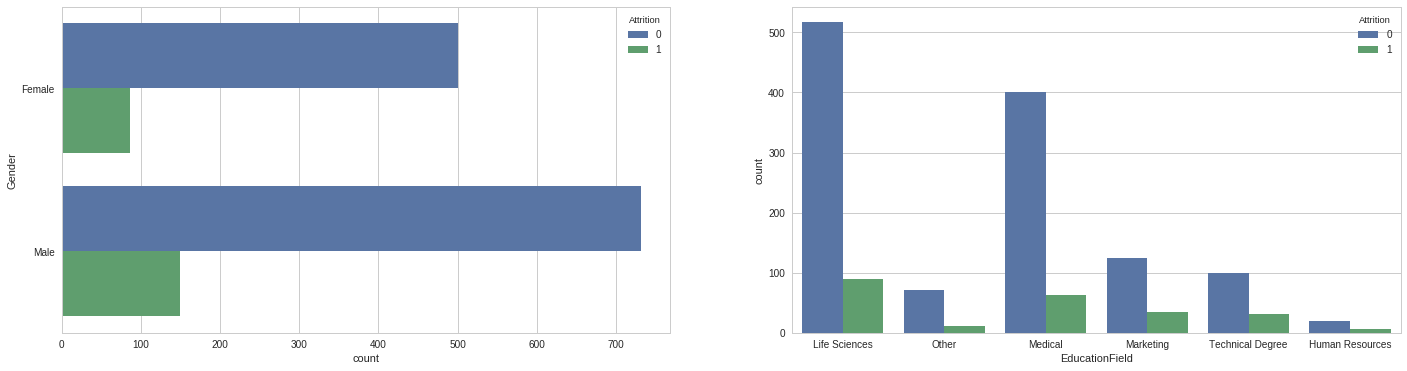

In [0]:
#Attrition across educational fields and Gender
fig, ax2 = plt.subplots(1,2, figsize=(24,6))
sns.countplot(x='EducationField', hue='Attrition', data = hrd, ax = ax2[1])
sns.countplot(y='Gender', hue='Attrition', data = hrd, ax = ax2[0])
plt.show()

People from life sciences are leaving more that any other educational field.

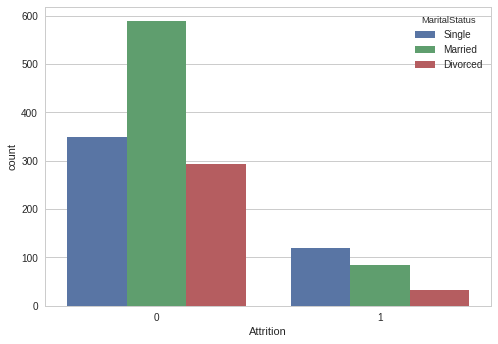

In [0]:
sns.countplot(x='Attrition', hue='MaritalStatus', data=hrd)
plt.show()



*   From here we can notice that married people are staying more and unmarried ones are more likely to leave.




In [0]:
#get all members who left the company. 
attr_yes = hrd[hrd.Attrition == 1]

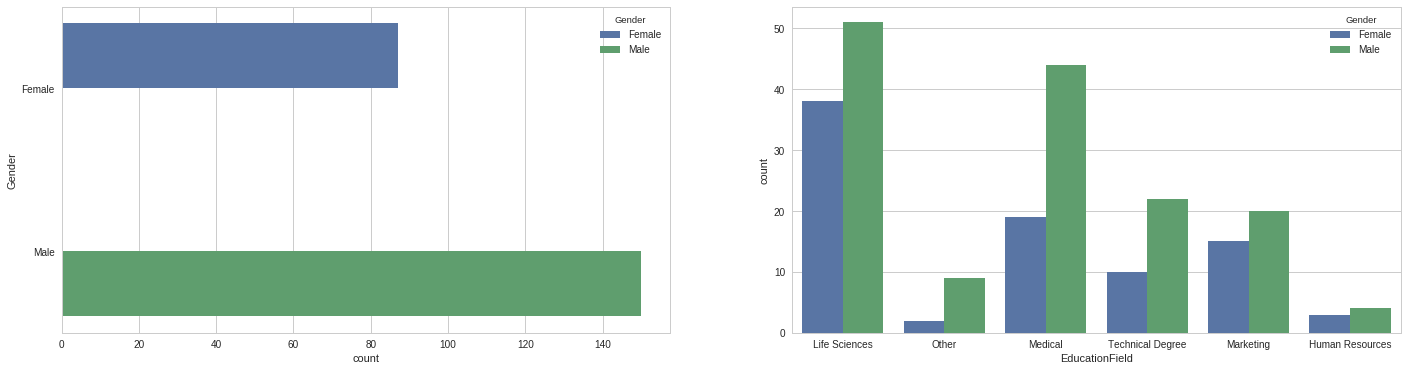

In [0]:
#Attrition across educational fields and Gender
fig, ax3 = plt.subplots(1,2, figsize=(24,6))
sns.countplot(x='EducationField', hue='Gender', data =attr_yes, ax = ax3[1])
sns.countplot(y='Gender', hue='Gender', data = attr_yes, ax = ax3[0])
plt.show()



*   Attrition rate is higher for men , so gender plays an important role in predicting the attrition




Conclusions:

1.   It seems that all categorical variables are important in predicting the Attrition rate.

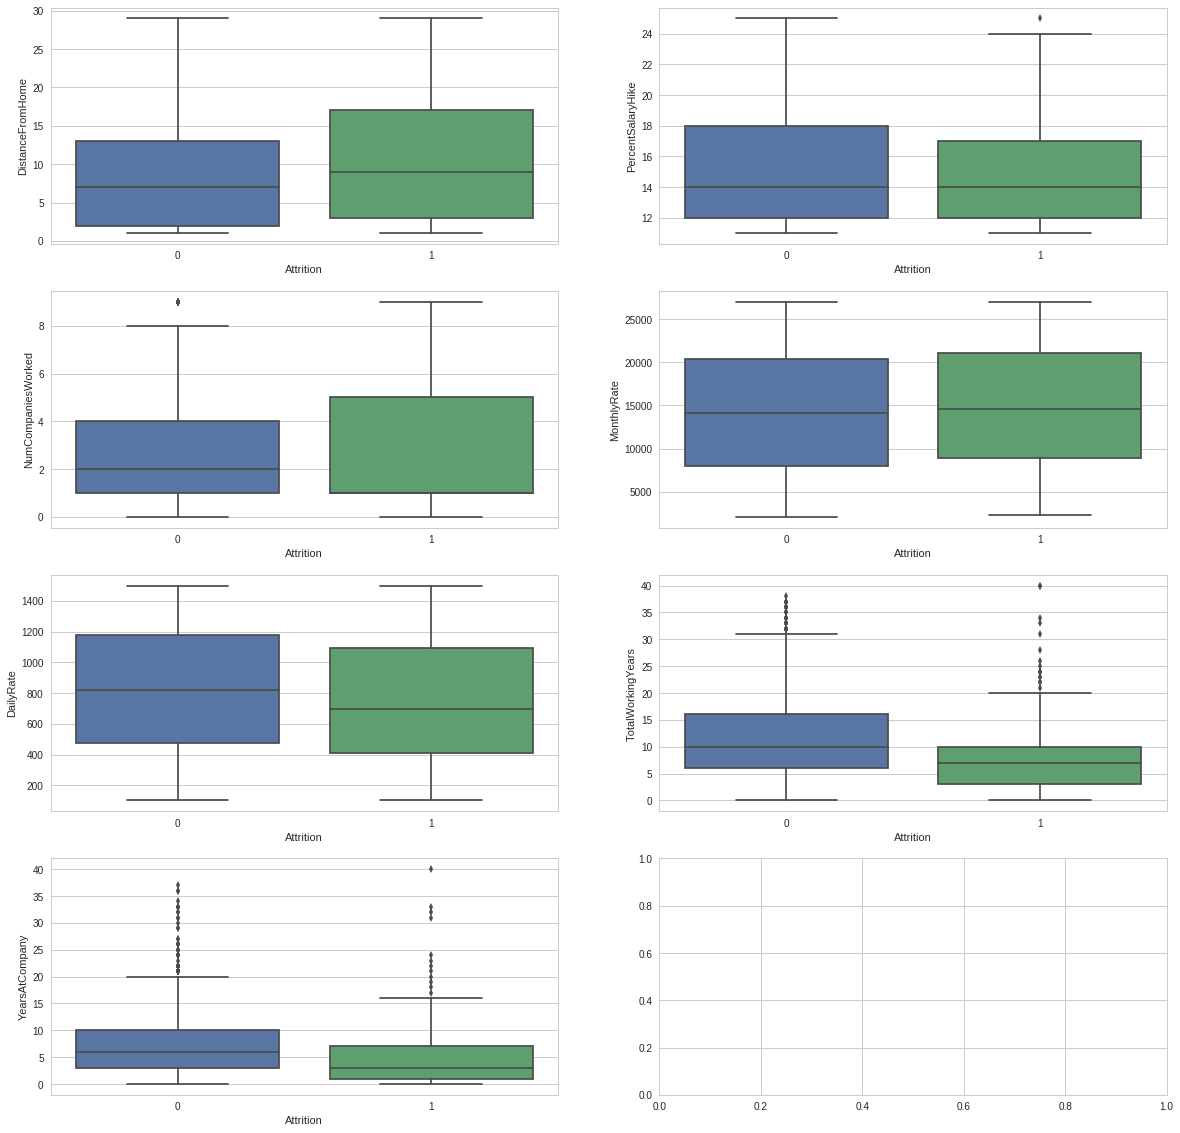

In [0]:

fig, ax4 = plt.subplots(4,2, figsize=(20,20))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=hrd, ax = ax4[0,0])
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=hrd, ax = ax4[0,1])
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=hrd, ax = ax4[1,0])
sns.boxplot(x='Attrition', y='MonthlyRate', data=hrd, ax = ax4[1,1])
sns.boxplot(x='Attrition', y='DailyRate', data=hrd, ax = ax4[2,0])
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=hrd, ax = ax4[2,1])
sns.boxplot(x='Attrition', y='YearsAtCompany', data=hrd, ax = ax4[3,0])

plt.show()

we can see that the there are few outliers from the box plots of Yearsatcompany,TotalWorkingYears,Percentagesalaryhike,no of companies worked

We try to count the no of outliers and remove them


In [0]:
#outliers are those lie away from 3 quantile range of median 
def removeOutliers(x):
    #calculating quantiles and IQR
    i=0
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    quartileSet = (Q1 - IQR, Q3 + IQR)
    for y in x.columns.values.tolist():
      hrd_row = x[(x[y] < quartileSet[0][y])  | (x[y] > quartileSet[1][y])]
      
      if i == 0:
        hrd_outliers = hrd_row
      else:
        hrd_outliers = pd.concat([hrd_outliers,hrd_row])
        
      print("no of outliers in",y,"are",hrd_row[y].count())
      i=i+1
    return hrd_outliers.drop_duplicates()
    
  

numerical_hrd = hrd.select_dtypes(['int64'])
hrd_outliers_final= removeOutliers(numerical_hrd)
hrd_outliers_final.describe()



no of outliers in Age are 33
no of outliers in Attrition are 237
no of outliers in DailyRate are 0
no of outliers in DistanceFromHome are 62
no of outliers in Education are 0
no of outliers in EnvironmentSatisfaction are 0
no of outliers in HourlyRate are 0
no of outliers in JobInvolvement are 0
no of outliers in JobLevel are 0
no of outliers in JobSatisfaction are 0
no of outliers in MonthlyIncome are 146
no of outliers in MonthlyRate are 0
no of outliers in NumCompaniesWorked are 101
no of outliers in PercentSalaryHike are 18
no of outliers in PerformanceRating are 226
no of outliers in RelationshipSatisfaction are 0
no of outliers in StockOptionLevel are 85
no of outliers in TotalWorkingYears are 112
no of outliers in TrainingTimesLastYear are 238
no of outliers in WorkLifeBalance are 0
no of outliers in YearsAtCompany are 138
no of outliers in YearsInCurrentRole are 46
no of outliers in YearsSinceLastPromotion are 183
no of outliers in YearsWithCurrManager are 33


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.00000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,37.947650,0.253205,805.757479,9.737179,2.935897,2.685897,65.90812,2.698718,2.258547,2.721154,7375.690171,14423.177350,2.974359,15.740385,3.241453,2.691239,0.839744,12.793803,2.963675,2.743590,7.932692,4.623932,2.790598,4.459402
std,9.661016,0.435080,407.816439,8.579627,1.019675,1.114635,20.24101,0.729104,1.245927,1.096529,5391.088575,7222.026959,2.709734,4.095637,0.428193,1.084538,0.924972,8.750933,1.488913,0.721304,7.061136,3.946653,3.747221,3.827910
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.00000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,461.750000,2.000000,2.000000,2.000000,49.00000,2.000000,1.000000,2.000000,2928.250000,8049.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,0.000000,800.000000,7.000000,3.000000,3.000000,66.00000,3.000000,2.000000,3.000000,5298.500000,14337.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,45.000000,1.000000,1169.000000,15.000000,4.000000,4.000000,84.00000,3.000000,3.000000,4.000000,10438.000000,20778.750000,5.000000,19.000000,3.000000,4.000000,1.000000,19.000000,4.000000,3.000000,10.000000,7.000000,4.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.00000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000




*   Since total no of points are less ,we are not removing those points from the original dataset  As no of outlier points are also huge.




Handling categorical variables
**method1:we use one hot encoding vectors for all of the categorical vectors**



In [0]:

#we use one hot encoding vectors for all of the categorical vectors
cat_vars=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"]
hrd_one_hot_enc=hrd
for var in cat_vars:
    #for each catogery of every cat_vars-column we are creating a new dimention(feature,column) name and asigning a value 1 or 0 
    #1 - that dimention is present for that row , 0 -not present for that row
    cat_list = pd.get_dummies(hrd_one_hot_enc[var], prefix=var)
    data1=hrd_one_hot_enc.join(cat_list)
    #adding all those new collumns to the hrd_one_hot_enc dataset
    hrd_one_hot_enc=data1
cat_vars=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"]
data_vars=hrd_one_hot_enc.columns.values.tolist()
#removing categorical columns from the hrd dataframe
to_keep=[i for i in data_vars if i not in cat_vars]
hrd_one_hot_enc=hrd_one_hot_enc[to_keep]



In [0]:
hrd_one_hot_enc.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


**method-2 :using arbitrary values based on the importance,frequency of occurence  or randomly values**

In [0]:

#method-2 :using arbitrary values based on the importance,frequency of occurence  or randomly values
hrd['JobRole'].replace('Sales Executive',1, inplace=True)
hrd['JobRole'].replace('Research Scientist',2, inplace=True)
hrd['JobRole'].replace('Laboratory Technician',3, inplace=True)
hrd['JobRole'].replace('Manufacturing Director',4, inplace=True)
hrd['JobRole'].replace('Healthcare Representative',5, inplace=True)
hrd['JobRole'].replace('Manager',6, inplace=True)
hrd['JobRole'].replace('Sales Representative',7, inplace=True)
hrd['JobRole'].replace('Research Director',8, inplace=True)
hrd['JobRole'].replace('Human Resources',9, inplace=True)
##############################
hrd['EducationField'].replace('Life Sciences',1, inplace=True)
hrd['EducationField'].replace('Medical',2, inplace=True)
hrd['EducationField'].replace('Marketing', 3, inplace=True)
hrd['EducationField'].replace('Other',4, inplace=True)
hrd['EducationField'].replace('Technical Degree',5, inplace=True)
hrd['EducationField'].replace('Human Resources', 6, inplace=True)
#hrd['EducationField'].value_counts()
#############################
hrd['Department'].replace('Research & Development',1, inplace=True)
hrd['Department'].replace('Sales',2, inplace=True)
hrd['Department'].replace('Human Resources', 3, inplace=True)
#hrd['Department'].value_counts()
#############################
hrd['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
hrd['BusinessTravel'].replace('Travel_Frequently',2, inplace=True)
hrd['BusinessTravel'].replace('Non-Travel',3, inplace=True)
#hrd['BusinessTravel'].value_counts()
#############################
hrd['Gender'].replace('Male',1, inplace=True)
hrd['Gender'].replace('Female',0, inplace=True)
#hrd['Gender'].value_counts()
#############################
hrd['MaritalStatus'].replace('Married',1, inplace=True)
hrd['MaritalStatus'].replace('Single',2, inplace=True)
hrd['MaritalStatus'].replace('Divorced',3, inplace=True)
#hrd['MaritalStatus'].value_counts()
#############################
hrd['OverTime'].replace('Yes',1, inplace=True)
hrd['OverTime'].replace('No',0, inplace=True)
#hrd['OverTime'].value_counts()


In [0]:
pd.set_option('display.max_columns', 51)#to display each and every collumn
hrd.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.392517,802.485714,1.389116,9.192517,2.912925,2.150340,2.721769,0.600000,65.891156,2.729932,2.063946,3.553061,2.728571,1.764626,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.568893,8.106864,1.024165,1.350636,1.093082,0.490065,20.329428,0.711561,1.106940,2.323902,1.102846,0.790757,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,3.000000,2.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,5.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,3.000000,1499.000000,3.000000,29.000000,5.000000,6.000000,4.000000,1.000000,100.000000,4.000000,5.000000,9.000000,4.000000,3.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


now we can see that each feature is a real number

**We now aim to use Machine Learning to model the data so as to accurately predict which employee will leave.**

WE USE RFE TO FIND BEST 15 FEATURES THAT CAN BE USED FOR LOGISTIC REGRESSION

In [0]:
#WE use recursive feature elimination method to find best features to train our model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

hr_vars=hrd.columns.values.tolist() # GETTNG all columns into a list
y=['Attrition']   #seperating Attrition - class that needs to be predicted
X=[i for i in hr_vars if i not in y] # getting all columns except Attrition
model = LogisticRegression() #defining a regression model

rfe = RFE(model, 15) #using rfe 
rfe = rfe.fit(hrd[X], hrd[y])
print("Ranking values for the columns")
print(rfe.support_)
print(rfe.ranking_)

j=0
selected_features=[]
#Getting all selected feautres into a list 
for i in rfe.support_:
  if i == True:
    selected_features.append(hr_vars[j])
  j = j+1
print("SELECTED FEATURES ----------------------------------------------------------------------------------------")
print(selected_features)

Ranking values for the columns
[False False False  True False False  True  True  True False  True  True
 False  True False False False  True  True False  True  True  True False
 False  True False  True  True False]
[10 11 14  1  8  9  1  1  1 12  1  1 13  1  3 15 16  1  1  7  1  1  1  5
  2  1  6  1  1  4]
SELECTED FEATURES ----------------------------------------------------------------------------------------
['DailyRate', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobRole', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole']


Or model predicts top 15 features features our model can use -
'DailyRate','Education', 'EducationField',EnvironmentSatisfaction','HourlyRate', 'JobInvolvement','JobRole','MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','TrainingTimesLastYear'

**we will seperate Attrition and remaining features  and create different type of data (using RFE selected columns, using all columns,using one_hot_encoding columns)*

In [0]:

#here we use all collumns or feauures to train the data

#split prediction label(column)cfrom dataset

#out predictions are present in Atrrn variable
Atrrn = hrd["Attrition"]
Atrrn_one_hot_enc = hrd_one_hot_enc["Attrition"]


#input dataset is here
input_hrd = hrd[hrd.columns.difference(['Attrition'])]
input_hrd_one_hot_enc = hrd_one_hot_enc[hrd_one_hot_enc.columns.difference(['Attrition'])]



In [0]:
#here we select only important data collumns(features)
input_hrd_rfe = input_hrd[selected_features]
Atrrn_rfe = hrd["Attrition"]
print("DATAFRAME WITH  RFE SELECTED COLLUMNS")
print(input_hrd_rfe.columns)
print(Atrrn_rfe.value_counts())
print("***************************************")
print("DATAFRAME WITH  ONE HOT ENCODING COLLUMNS")
print(input_hrd_one_hot_enc.columns)
print(Atrrn_one_hot_enc.value_counts())


DATAFRAME WITH  RFE SELECTED COLLUMNS
Index(['DailyRate', 'Education', 'EducationField', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole'],
      dtype='object')
0    1233
1     237
Name: Attrition, dtype: int64
***************************************
DATAFRAME WITH  ONE HOT ENCODING COLLUMNS
Index(['Age', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'DailyRate',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'DistanceFromHome', 'Education',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSa

**we will standardize our data**

In [0]:
#FIRST WE SCALE OUR COLLUMNS
scaler = preprocessing.StandardScaler()
scaled_hrd_rfe = scaler.fit_transform(input_hrd_rfe)
scaled_hrd = scaler.fit_transform(input_hrd)
scaled_hrd_one_hot_enc = scaler.fit_transform(input_hrd_one_hot_enc)

In [0]:
# we will split our data to test and train sets (70% train , 30 % test)

from sklearn.model_selection import train_test_split

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(scaled_hrd_rfe, Atrrn_rfe, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(scaled_hrd, Atrrn, test_size=0.3)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(scaled_hrd_one_hot_enc, Atrrn, test_size=0.3)

In [0]:
print("xtrain-shape",X_train.shape)
print("xtest-shape",X_test.shape)
print("xtrain_rfe-shape",X_train_rfe.shape)
print("xtest_rfe-shape",X_test_rfe.shape)
print("xtrain_enc-shape",X_train_enc.shape)
print("xtest_enc-shape",X_test_enc.shape)
print("ytrain-shape",y_train.shape)
print("ytest-shape",y_test.shape)
print("ytrain-counts\n",y_train.value_counts())
print("ytest-counts\n",y_test.value_counts())

xtrain-shape (1029, 30)
xtest-shape (441, 30)
xtrain_rfe-shape (1029, 15)
xtest_rfe-shape (441, 15)
xtrain_enc-shape (1029, 51)
xtest_enc-shape (441, 51)
ytrain-shape (1029,)
ytest-shape (441,)
ytrain-counts
 0    871
1    158
Name: Attrition, dtype: int64
ytest-counts
 0    362
1     79
Name: Attrition, dtype: int64


WE USE ALL ORIGINAL COLUMNS FOR TRAINING 
AND TO TUNE THE HYPER PARAMETERS
WE DO A GRID SEARCH TO FIND THE BEST COEFFICIENT OF REGULARISER AND TYPE OF 
REGLARISER

In [0]:
#we apply logistic regression classifier to train and evaluate it with test data

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

#Using GridSearchCV to estimate best hyperparameter ( coefficient of regulariser)

tuned_parameters = [{'C': [10**-6, 10**-5,10**-4, 10**-2, 10**0, 10**2, 10**4,10**5,10**6]}]

model = GridSearchCV(LogisticRegression(max_iter=100), tuned_parameters, scoring = 'f1', cv=5)

model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
0.5413533834586465


We can clearly see that model is underfitting and could able to find optimal regulariser

WE USE A RADOM SEARCH CV AND WE WILL FIND OUR COEFFICIENT FROM A UNIFORM DISTRIBUTION FROM (0 TO 4)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

model_random = RandomizedSearchCV(LogisticRegression(max_iter=100), hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
model_random.fit(X_train, y_train)
print(model_random.best_estimator_)
print(model_random.score(X_test, y_test))


LogisticRegression(C=0.15621913293152945, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
0.8707482993197279


**Here we got a good accuracy of 87% on test accuracy , optimal c(inverse of coefficient of regulariser) value taken is 0.7952 it used an l2 regulariser.**

[[355   7]
 [ 50  29]]


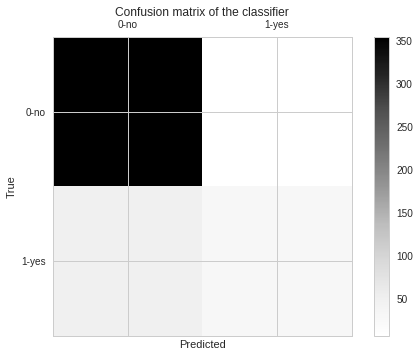

In [0]:
lg_predictions = model_random.predict(X_test)
labels = ['0-no', '1-yes']
cm = confusion_matrix(y_test, lg_predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

here our model performed poorly at predicting the '1' -YES CLASS, True positive rate is very low 
Here.

To improve accuracy 

1.   we can search for different  c values in a different range we can use selected column features obtained from rfe 
2.   we will upsample the train datavalues using smote algorithm or by other techniques and see how model performs.

1.   we can use selected features from RFE or one_hot_encoded features for training and look for the results










**  NOW WE USE DESICION TREES TO BUILD THE MODEL**

#SMOTE to oversample due to the skewness in target

Since we have a highly imbalanced dataset we use smote to upsample trian data,note that we are not touching test data.Decision tree needs a balanced dataset for having a good performance.

In [0]:
#as we know that descision tree based algorithm doesnt require scaling we use the original variables
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(input_hrd, Atrrn, test_size=0.3)

In [0]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train_unscaled, y_train_unscaled)

In [0]:
smote_target_pd = pd.DataFrame(smote_target)
smote_target_pd[0].value_counts()

1    865
0    865
Name: 0, dtype: int64

here we can see that the train data has perfectly balanced data.

In [0]:
# Gradient Boosting Parameters
seed=0 #for reproducability
gb_params ={
    'n_estimators': 1500,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

Having defined our parameters, we can now apply the usual fit and predict methods on our train and test sets respectively

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(X_test_unscaled)
print("Predictions have finished")

Predictions have finished


In [0]:
print(accuracy_score(y_test_unscaled, gb_predictions))
print(classification_report(y_test_unscaled, gb_predictions))

0.8571428571428571
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       368
           1       0.61      0.38      0.47        73

   micro avg       0.86      0.86      0.86       441
   macro avg       0.75      0.67      0.69       441
weighted avg       0.84      0.86      0.84       441



**CONFUSION MATRIX**

[[350  18]
 [ 45  28]]


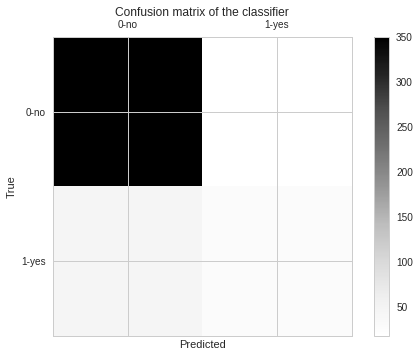

In [0]:
labels = ['0-no', '1-yes']
cm = confusion_matrix(y_test_unscaled, gb_predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

we can see that the predictions for '0' is higher since the data points are more skewed towards
0, and predictions for 1 are fairly small .This model also have very True positive Rate

CONCLUSION
We have constructed a very simple model of predicting employee attrition, from some basic Exploratory Data Analysis to feature engineering as well as implementing two learning models in the form of a Logistic regression and a Gradient Boosting classifier. it even returns a **85**% accuracy in its predictions.

That being said, there is quite a lot of room for improvement. For one, more features could be engineered from the data.It is best to build few more classifiers and take a majoriy vote on it

# Artificial Neural Network implementation

Deep Learning works better with bigger datasets, this one being really tiny but we'll try to get higher accuracies than above classifiers

here we use data which was transformed using on hot encoding of categorical variables

we cannot randomly give a value(using label encoder ) this because if we leave Single as 0, Married as 1 and Divorced as 2, the network would understand that divorced > married, which doesn't make any sense.



In [0]:
#use this  if not splitted:
#X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(scaled_hrd_one_hot_enc, Atrrn, test_size=0.3)
#importing keras libraries to build neural network
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop,SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.initializers import RandomNormal
from keras.optimizers import Adadelta

In [0]:
# These Hyperparameters  are tuned from gridsearch 
dropout = 0.4
nb_epoch = 100
batch_size = 10
input_dim = X_train_enc.shape[1]
learn_rate=0.3
print(X_train_enc.shape[1])

51


To avoid overfitting such a tiny dataset we will use dropout (randomly putting "off" 10% of the neurons to help them become more independent) and we use grid search techniques to tune all the hyper parameters

hyper parameter tuning code inspired from :
https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [0]:
#hypertuning batch size and epochs
#we define a function that will return a neural network model 
def best_hyperparameters():

    model = Sequential()
    model.add(Dense(16, activation='sigmoid', input_shape=(input_dim,), kernel_initializer="truncated_normal"))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer


    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model
# fix random seed for reproducibility
seed = 7
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
#keras classifier
model = KerasClassifier(build_fn=best_hyperparameters,verbose=0)
#parameters that are needed to be tuned
param_grid = dict(batch_size=batch_size, epochs=epochs)
#performing grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_enc, y_train_enc)
#result summary
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.870748 using {'batch_size': 10, 'epochs': 100}
0.833819 (0.014480) with: {'batch_size': 10, 'epochs': 10}
0.869776 (0.020246) with: {'batch_size': 10, 'epochs': 50}
0.870748 (0.022874) with: {'batch_size': 10, 'epochs': 100}
0.833819 (0.014480) with: {'batch_size': 20, 'epochs': 10}
0.853256 (0.020524) with: {'batch_size': 20, 'epochs': 50}
0.866861 (0.017221) with: {'batch_size': 20, 'epochs': 100}
0.833819 (0.014480) with: {'batch_size': 40, 'epochs': 10}
0.833819 (0.014480) with: {'batch_size': 40, 'epochs': 50}
0.864917 (0.022874) with: {'batch_size': 40, 'epochs': 100}
0.833819 (0.014480) with: {'batch_size': 60, 'epochs': 10}
0.833819 (0.014480) with: {'batch_size': 60, 'epochs': 50}
0.845481 (0.020339) with: {'batch_size': 60, 'epochs': 100}
0.833819 (0.014480) with: {'batch_size': 80, 'epochs': 10}
0.833819 (0.014480) with: {'batch_size': 80, 'epochs': 50}
0.836735 (0.012596) with: {'batch_size': 80, 'epochs': 100}
0.833819 (0.014480) with: {'batch_size': 100, 'epochs':

In [0]:
#hypertuning active functions that are needed to be used
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(16, activation='sigmoid', input_shape=(input_dim,), kernel_initializer="truncated_normal"))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer


    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model
# fix random seed for reproducibility
seed = 7

activ = ['sigmoid','relu']
#keras classifier
model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)

param_grid = dict(activ=activ)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_enc, y_train_enc)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.872692 using {'activ': 'sigmoid'}
0.872692 (0.019241) with: {'activ': 'sigmoid'}
0.871720 (0.017972) with: {'activ': 'relu'}


In [0]:
#Tuning the Training Optimization Algorithm

def best_hyperparameters(optimizer='adam'):

    model = Sequential()
    model.add(Dense(16, activation='sigmoid', input_shape=(input_dim,), kernel_initializer="truncated_normal"))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer


    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    return model
# fix random seed for reproducibility
seed = 7
model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_enc, y_train_enc)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.869776 using {'optimizer': 'Adadelta'}
0.856171 (0.010734) with: {'optimizer': 'SGD'}
0.864917 (0.017221) with: {'optimizer': 'RMSprop'}
0.847425 (0.023485) with: {'optimizer': 'Adagrad'}
0.869776 (0.019241) with: {'optimizer': 'Adadelta'}
0.867833 (0.021600) with: {'optimizer': 'Adam'}
0.868805 (0.014866) with: {'optimizer': 'Adamax'}
0.864917 (0.022118) with: {'optimizer': 'Nadam'}


In [0]:
#hypertuning learning rate for Adadelta
from keras.optimizers import Adadelta
def best_hyperparameters(learn_rate=0.01):

    model = Sequential()
    model.add(Dense(16, activation='sigmoid', input_shape=(input_dim,), kernel_initializer="truncated_normal"))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    optimizer=Adadelta(lr=learn_rate, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    return model
# fix random seed for reproducibility
seed = 7

#keras classifier
model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_enc, y_train_enc)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.859086 using {'learn_rate': 0.3}
0.833819 (0.014480) with: {'learn_rate': 0.001}
0.833819 (0.014480) with: {'learn_rate': 0.01}
0.833819 (0.014480) with: {'learn_rate': 0.1}
0.848396 (0.014866) with: {'learn_rate': 0.2}
0.859086 (0.021600) with: {'learn_rate': 0.3}


In [0]:
#hypertuning weight initialisations
def best_hyperparameters(init_mode='uniform'):

    model = Sequential()
    model.add(Dense(16, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=init_mode))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer=init_mode, activation = 'sigmoid', )) #outputlayer
    optimizer=Adadelta(lr=0.3, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    return model
# fix random seed for reproducibility
seed = 7


#keras classifier
model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_enc, y_train_enc)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.875607 using {'init_mode': 'he_normal'}
0.857143 (0.017166) with: {'init_mode': 'uniform'}
0.869776 (0.030976) with: {'init_mode': 'lecun_uniform'}
0.868805 (0.017972) with: {'init_mode': 'normal'}
0.859086 (0.018181) with: {'init_mode': 'zero'}
0.874636 (0.022708) with: {'init_mode': 'glorot_normal'}
0.869776 (0.025004) with: {'init_mode': 'glorot_uniform'}
0.875607 (0.023120) with: {'init_mode': 'he_normal'}
0.864917 (0.026113) with: {'init_mode': 'he_uniform'}


In [0]:
#hypertuning drop out rate
def best_hyperparameters(dropout_rate=0.0):

    model = Sequential()
    model.add(Dense(16, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_normal'))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer='he_normal', activation = 'sigmoid', )) #outputlayer
    optimizer=Adadelta(lr=0.3, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    return model
# fix random seed for reproducibility
seed = 7


#keras classifier
model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_enc, y_train_enc)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.873664 using {'dropout_rate': 0.9}
0.870748 (0.023844) with: {'dropout_rate': 0.0}
0.864917 (0.019821) with: {'dropout_rate': 0.1}
0.867833 (0.023844) with: {'dropout_rate': 0.2}
0.866861 (0.025230) with: {'dropout_rate': 0.3}
0.869776 (0.022625) with: {'dropout_rate': 0.4}
0.870748 (0.024431) with: {'dropout_rate': 0.5}
0.870748 (0.018181) with: {'dropout_rate': 0.6}
0.867833 (0.026756) with: {'dropout_rate': 0.7}
0.868805 (0.021424) with: {'dropout_rate': 0.8}
0.873664 (0.023844) with: {'dropout_rate': 0.9}


In [0]:
#hypertuning no of neurons in a layer
def best_hyperparameters(neurons=1):

    model = Sequential()
    model.add(Dense(neurons, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_normal'))
    model.add(Dropout(0.4))
    model.add(Dense(1, kernel_initializer='he_normal', activation = 'sigmoid', )) #outputlayer
    optimizer=Adadelta(lr=0.3, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    return model
# fix random seed for reproducibility
seed = 7


#keras classifier
model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)

neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_enc, y_train_enc)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.866861 using {'neurons': 25}
0.833819 (0.014480) with: {'neurons': 1}
0.833819 (0.014480) with: {'neurons': 5}
0.864917 (0.019093) with: {'neurons': 10}
0.862974 (0.021817) with: {'neurons': 15}
0.862974 (0.028861) with: {'neurons': 20}
0.866861 (0.031068) with: {'neurons': 25}
0.864917 (0.030976) with: {'neurons': 30}


By hyperparameter tuning we found the best parameters for our model. they are as follows


*   dropout = 0.4
*   no of epoch = 100


*   batch_size = 10
*   learn_rate=0.3

*  best weight initializations = he-normal
*   best optimiser =Adadelta

*   no of neurons in  the layer = 25
*  activation function = 'sigmoid'







>** now we will construct our simple neural network**




In [0]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(25, activation='sigmoid', input_shape=(input_dim,),kernel_initializer='he_normal'))
model_sigmoid.add(Dropout(0.4))
model_sigmoid.add(Dense(1, kernel_initializer='he_normal', activation = 'sigmoid', )) #outputlayer

model_sigmoid.summary()

optimizer=Adadelta(lr=0.3, rho=0.95, epsilon=None, decay=0.0)
model_sigmoid.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                1300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 1,326
Trainable params: 1,326
Non-trainable params: 0
_________________________________________________________________


In [0]:
#we will train and evaluate our model
history = model_sigmoid.fit(X_train_enc, y_train_enc, batch_size=10, epochs=100, verbose=1, validation_data=(X_test_enc, y_test_enc))

Train on 1029 samples, validate on 441 samples
Epoch 1/100
1029/1029 [==============================] - 1s 661us/step - loss: 0.8822 - acc: 0.3664 - val_loss: 0.7484 - val_acc: 0.4308
Epoch 2/100
1029/1029 [==============================] - 0s 130us/step - loss: 0.7010 - acc: 0.5520 - val_loss: 0.6137 - val_acc: 0.7256
Epoch 3/100
1029/1029 [==============================] - 0s 130us/step - loss: 0.5890 - acc: 0.6832 - val_loss: 0.5272 - val_acc: 0.8435
Epoch 4/100
1029/1029 [==============================] - 0s 130us/step - loss: 0.5348 - acc: 0.7580 - val_loss: 0.4727 - val_acc: 0.8458
Epoch 5/100
1029/1029 [==============================] - 0s 128us/step - loss: 0.5065 - acc: 0.7852 - val_loss: 0.4386 - val_acc: 0.8458
Epoch 6/100
1029/1029 [==============================] - 0s 127us/step - loss: 0.4718 - acc: 0.8076 - val_loss: 0.4174 - val_acc: 0.8458
Epoch 7/100
1029/1029 [==============================] - 0s 128us/step - loss: 0.4417 - acc: 0.8299 - val_loss: 0.4029 - val_acc: 0

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.32241781039032535
Test accuracy: 0.8752834461713864


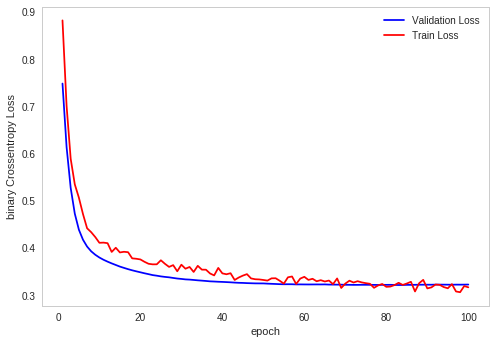

In [0]:
score = model_sigmoid.evaluate(X_test_enc, y_test_enc, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,100+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#here we convert probabilities into 1's and 0's
nn_predictions = model_sigmoid.predict(X_test_enc)
y_test_enc_array=np.array(y_test_enc)
nn_predictions_array=[]
j=0
for i in nn_predictions:
  if i[0] < 0.5:
    nn_predictions_array.append(y_test_enc_array[j])
  else:
    if y_test_enc_array[j] == 1:
      nn_predictions_array.append(0)
    else:
      nn_predictions_array.append(1)
  j=j+1
print(len(nn_predictions_array))   

441


[[363  10]
 [ 23  45]]


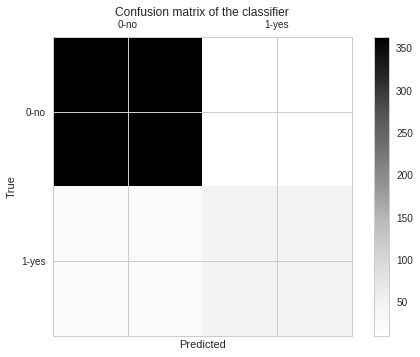

In [0]:
#creating confusion matrix
labels = ['0-no', '1-yes']
cm = confusion_matrix(y_test_enc_array, nn_predictions_array)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


unlike logistic regression and decision tree neural network has siginificantly good True positive rate.

CONCLUSIONS

*   we can see that all three models have same accuracy 

*   By care fully observing the confusion matrix, all three models  predicts '0' class with good accuracy but accuracy of predicting class '1' is higher for neural networks model 
*   acuracy of predicting class - 1: logistic_regression < decisiontree < neuralnetworks
*   we can even achieve higher accuracies using feature engineering techniques





We will try to use more layers in our neural network architecture

In [0]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(51, activation='sigmoid', input_shape=(input_dim,),kernel_initializer='he_normal'))
model_sigmoid.add(Dropout(0.4))
model_sigmoid.add(Dense(25, activation='sigmoid',kernel_initializer='he_normal'))
model_sigmoid.add(Dense(1, kernel_initializer='he_normal', activation = 'sigmoid', )) #outputlayer

model_sigmoid.summary()

optimizer=Adadelta(lr=0.3, rho=0.95, epsilon=None, decay=0.0)
model_sigmoid.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train_enc, y_train_enc, batch_size=10, epochs=100, verbose=1, validation_data=(X_test_enc, y_test_enc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 51)                2652      
_________________________________________________________________
dropout_10 (Dropout)         (None, 51)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 25)                1300      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 26        
Total params: 3,978
Trainable params: 3,978
Non-trainable params: 0
_________________________________________________________________
Train on 1029 samples, validate on 441 samples
Epoch 1/100
1029/1029 [==============================] - 1s 706us/step - loss: 0.4794 - acc: 0.8358 - val_loss: 0.4311 - val_acc: 0.8458
Epoch 2/100
1029/1029 [==============================] - 0s 158us/step - loss: 0.4423 - 

Test score: 0.30331263811139564
Test accuracy: 0.8888888895646785


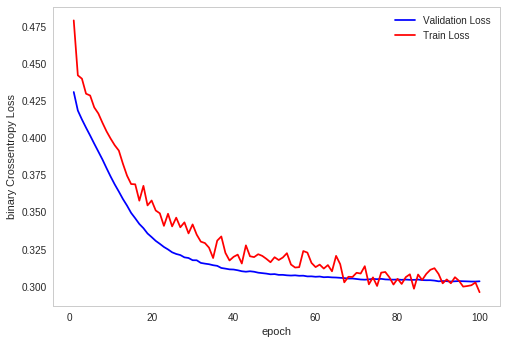

In [0]:
score = model_sigmoid.evaluate(X_test_enc, y_test_enc, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,100+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


In [0]:
#here we convert probabilities into 1's and 0's
nn_predictions = model_sigmoid.predict(X_test_enc)
y_test_enc_array=np.array(y_test_enc)
nn_predictions_array=[]
j=0
for i in nn_predictions:
  if i[0] < 0.5:
    nn_predictions_array.append(y_test_enc_array[j])
  else:
    if y_test_enc_array[j] == 1:
      nn_predictions_array.append(0)
    else:
      nn_predictions_array.append(1)
  j=j+1
print(len(nn_predictions_array))  

441


[[360  13]
 [ 32  36]]


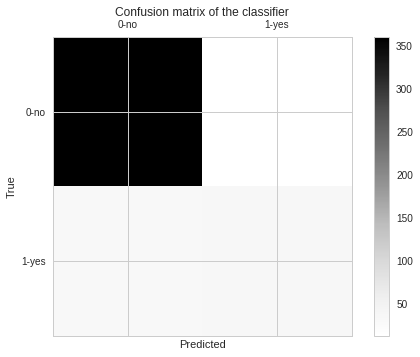

In [0]:
#creating confusion matrix
labels = ['0-no', '1-yes']
cm = confusion_matrix(y_test_enc_array, nn_predictions_array)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


even though  overall accuracy increased slightly , accuracy to predict class-1-"Yes"(Attrition) reduced drastically(true positive rate is very low).